In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# reading the data into a pandas data frame.
data = pd.read_csv('Speed_dataset.csv')
df = pd.DataFrame(data)

In [5]:
#print(df.columns)
print(df)

         latitude  longitude         timestamp  speed_mph  speedlimit_mph  \
0       34.640141 -77.938721     6/1/2015 0:04         64              70   
1       34.643730 -77.939400     6/1/2015 0:04         64              70   
2       34.551254 -78.784630     6/1/2015 0:04          1              55   
3       35.613663 -78.470596     6/1/2015 0:06         62              70   
4       35.614525 -78.474670     6/1/2015 0:06         61              70   
5       34.860115 -77.999969     6/1/2015 0:19         64              70   
6       34.328571 -78.926056     6/1/2015 0:24         23              55   
7       35.756538 -78.699715     6/1/2015 0:30          3              55   
8       34.402813 -78.916901     6/1/2015 0:33         65              70   
9       35.039543 -78.149475     6/1/2015 0:34         64              70   
10      35.042751 -78.150772     6/1/2015 0:34         64              70   
11      34.443115 -78.959885     6/1/2015 0:36         64              70   

In [6]:
speed = df['speed_mph']

# calculating basic measures of central tendency

# mean
mean = np.mean(speed)
print(mean)

# std_deviation
std_deviation = np.std(speed)
print(std_deviation)

# variance
variance = std_deviation**2
print(variance)

38.1761294190229
24.945942878865157
622.3000661156033


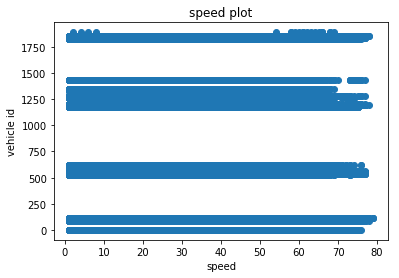

In [7]:
# scatter plot of the speeds of various drivers
# x-axis = speed. y-axis = driver id (unique identifier)

% matplotlib inline

driver_id = df['vehicle_id']

plt.scatter(speed, driver_id//1000)
plt.title('speed plot')
plt.xlabel('speed')
plt.ylabel('vehicle id')
plt.show()

In [8]:
state = df['state']

# different names of states
print(set(state))

{'NC', 'GA', 'VA', 'SC'}


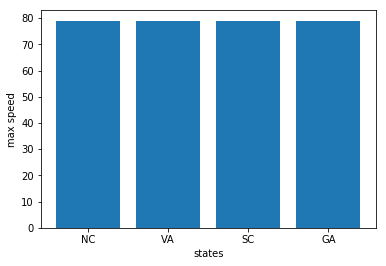

79


In [9]:
# grouping the data into states.
states = {'NC': np.where(df == 'NC', df, df), 'VA': np.where(df == 'VA', df, df), 'SC': np.where(df == 'SC', df, df), 'GA': np.where(df == 'GA', df, df)}

#print(states['NC'][:, 3])

plt.bar(['NC', 'VA', 'SC', 'GA'], [np.max(states['NC'][:, 3]), np.max(states['VA'][:, 3]), np.max(states['SC'][:, 3]), np.max(states['GA'][:, 3])])
plt.xlabel('states')
plt.ylabel('max speed')
plt.show()

# it can be observed that the max speed is the same in every state. i.e, 79
print(np.max(states['NC'][:, 3]))

In [10]:
from scipy.stats import iqr

# The IQR approximates the amount of spread in the middle 50% of the data
print(iqr(speed))

print(np.percentile(speed, 25))
print(np.percentile(speed, 75))


54.0
10.0
64.0


38.1761294190229


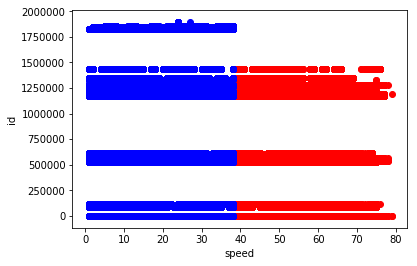

In [11]:
speed_list = list(speed)
speed_list.sort()
print(mean)
below = []
ind = 0
for i in range(len(speed_list)):
    if(speed_list[i] > mean):
        ind = i
        break
    else:
        below.append(speed_list[i])
        
above = speed_list[ind:]

'''
plotting the speed values that are greater than avg in red and below avg in green.

'''
plt.scatter(above, [df['vehicle_id'][i] for i in range(len(above))], color = 'r')
plt.scatter(below, [df['vehicle_id'][i] for i in range(len(above), len(df))], color = 'b')
plt.xlabel('speed')
plt.ylabel('id')
plt.show()


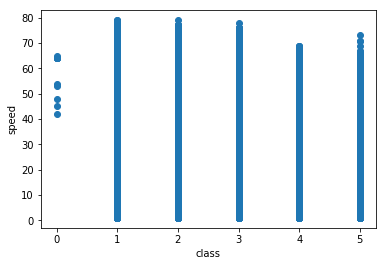

In [12]:
# plot of various functional classes with the speed

plt.scatter(df['functionalClass'], speed)
plt.xlabel('class')
plt.ylabel('speed')
plt.show()

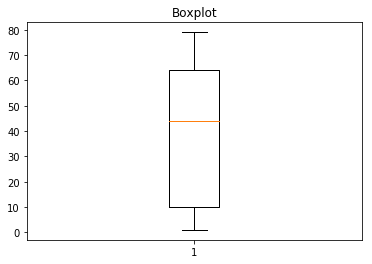

In [13]:
# boxplot shows:
# topmost __ = maximum
# bottom __ = minimum
# red line = median
# lower end of the box = first quartile
# upper end of the box = third quartile
# area of the box = Interquartile Range (IQR)

plt.boxplot(speed)
plt.title('Boxplot')
plt.show()

{'NC', 'GA', 'VA', 'SC'}


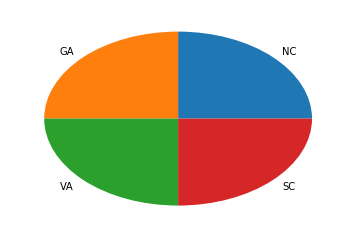

In [14]:
# pie chart with state distributions
print(set(state))
plt.pie([len(states['NC'][:, 3]), len(states['VA'][:, 3]), len(states['SC'][:, 3]), len(states['GA'][:, 3]) ], labels = list(set(state)))
plt.show()

# as you can see, each state occupies an equal share in the pie chart.

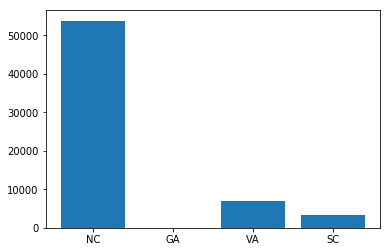

In [53]:
#print(speed_list)
speed_limit = df['speedlimit_mph']
speed_list = list(speed)
violations = []
speed_lim_violations = []
ishighway = []
nothighway = []
highway = list(df['isHighway'])
statewise_distribution = {}
fc = list(df['functionalClass'])
functional_class = {}
ts = list(df['timestamp'])
ts = [ts[i].split(' ')[0] for i in range(len(ts))]

# finding the people who have commited speed violations by comparing their speed with the speed limit.
for i in range(len(speed_limit)):
    if(speed[i] > speed_limit[i]):
        violations.append(speed[i])
        speed_lim_violations.append(speed_limit[i])
        statewise_distribution[state[i]] = statewise_distribution.get(state[i], 0) + 1
        if(highway[i] == 1):
            ishighway.append(highway[i])
        else:
            nothighway.append(highway[i])
        functional_class[fc[i]] = functional_class.get(fc[i], 0) + 1 

plt.bar(list(set(state)), [statewise_distribution['NC'], statewise_distribution['GA'], statewise_distribution['VA'], statewise_distribution['SC']])
plt.show()


<h1 style = "text-align: center;"> Observations </h1>

<ol>
<li> Highest speed violations are from NC </li>
    
<li> state GA has no speed violations </li>
    
<li> states SC and VA have very few Violations </li>
    
<li> therefore, NC is the most violent state </li>

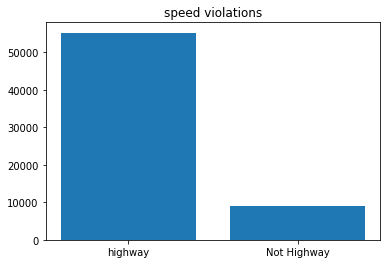

In [60]:
plt.bar(['highway', 'Not Highway'], [len(ishighway), len(nothighway)])
plt.title('speed violations')
plt.show()

<h1 style = "text-align: center;"> Observations </h1>

<ul>
    <li> Most speed violations happen in highways </li>

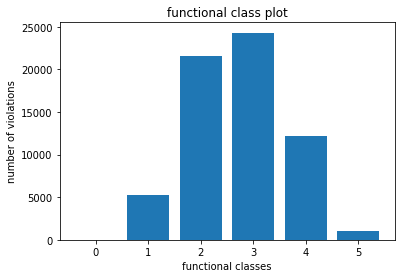

In [41]:
plt.bar(['0', '1', '2', '3', '4', '5'], [functional_class[0], functional_class[1], functional_class[2], functional_class[3], functional_class[4], functional_class[5]])
plt.title('functional class plot')
plt.xlabel('functional classes')
plt.ylabel('number of violations')
plt.show()


<h1 style = "text-align: center;"> Observations </h1>

<ul>
    <li> Most speed violations happen in functional class 3 </li>
    <li> Least speed violations happen in FC 0 </li>
    
    

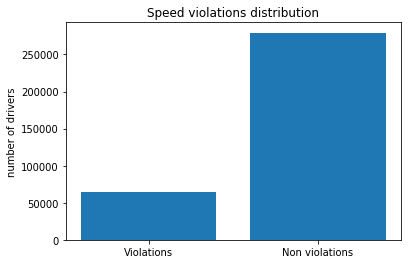

In [45]:
l = len(speed_list)
vlen = len(violations)

plt.bar(['Violations', 'Non violations'], [vlen, l - vlen])
plt.title('Speed violations distribution')
plt.ylabel('number of drivers')
plt.show()

<h1 style = "text-align: center;"> Observations </h1>

<ul>
    <li> speed violations are less compared to non violations</li>


In [74]:
import plotly.plotly as py 
import plotly.graph_objs as go 
import pandas as pd 

data = dict(type = 'choropleth', 
   
            locations = ['NC', 'GA', 'VA', 'SC'], 
            locationmode = 'USA-states', 
            colorscale = 'Portland', 
            text = ['North carolina', 'Georgia', 'Virginia', 'South Carolina'], 
            z = [1.0, 2.0, 3.0, 4.0], 
            colorbar = {'title': 'geoplot of the different states'}) 
              
layout = dict(geo ={'scope': 'usa'}) 
 
choromap = go.Figure(data = [data], layout = layout) 
  
iplot(choromap) 